In [18]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 50)

In [19]:
df = pd.read_pickle("../data/clean/_clean_data.pkl")

In [20]:
# df.drop('postalCode', axis=1, inplace=True)

# split houses and appartments
df_h = df[df['type'] == 'HOUSE']
df_a = df[df['type'] == 'APARTMENT']
print(df_a.shape)
print(df_h.shape)



(6052, 29)
(5402, 29)


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


def preprocess_data(df):
    
    # encode categorical features
    df_encoded = pd.get_dummies(df)

    # split into features and target
    y = df_encoded['price']
    X = df_encoded.drop('price', axis=1)

    # split into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    pass

def scale_float(X_train, X_test):
    # scale features
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    df_scaled_X_train = (pd.DataFrame(scaled_X_train, columns=X_train.columns))
    df_scaled_X_test = (pd.DataFrame(scaled_X_test, columns=X_test.columns))
    
    return df_scaled_X_train, df_scaled_X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = preprocess_data(df_h)
X_train['netHabitableSurface'].max()

0.9999999999999999

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, GridSearchCV
import matplotlib.pyplot as plt


def model_eval(model, X_train, X_test, y_train, y_test, y_pred):
    # weights associated with each features
    print("Coefficients: \n", model.coef_)
    
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    print(f"Training score: {model.score(X_train, y_train)}")
    print(f"Test score: {model.score(X_test, y_test)}")
    kfold = KFold(n_splits = 5)
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=kfold)
    print(f'Cross validation scores: \n {scores}') 
    
    plt.scatter(y_test, y_pred, color="black")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="blue", linewidth=3)

    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")

    plt.show()
    

def train_linear(df):
    X_train, X_test, y_train, y_test = preprocess_data(df)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_eval(model, X_train, X_test, y_train, y_test, y_pred)
    
    
    

In [28]:
df_h_district = df_h.drop(['province', 'region'], axis=1)
df_h_region = df_h.drop(['province', 'district'], axis=1)
df_h_localisation = df_h.drop(['province', 'district', 'region'], axis=1)
df_h_type = df_h.drop(['showerRoomCount', 'parkingCountIndoor', 'heatingType', 'saleType', 'hasAirConditioning', 'fireplaceExists', 'type', 'province', 'district'], axis=1)



Coefficients: 
 [-1.87471679e+04 -6.17225573e+03  2.14581180e+04 ... -1.22318845e+17
 -1.22318845e+17 -1.22318845e+17]
Mean squared error: 1665706482792168988432392733589504.00
Coefficient of determination: -84690358117878621798400.00
Training score: 0.9554750739454142
Test score: -8.469035811787862e+22
Cross validation scores: 
 [-1.41468725e+22 -9.64936473e+21 -1.00888447e+24 -2.28548467e+23
 -1.65952817e+24]


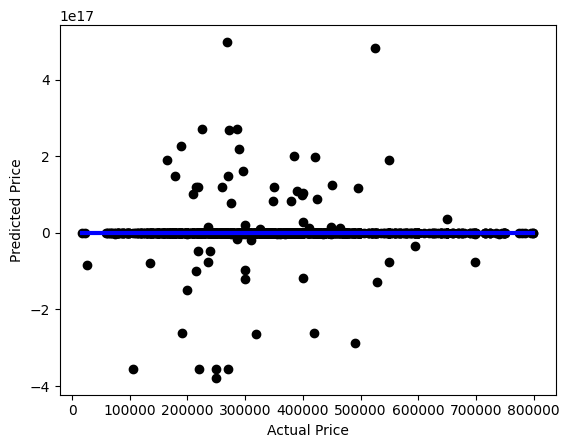

In [29]:
# dropped province district and region

train_linear(df_h_type)

In [26]:
prep_df_h.head()

NameError: name 'prep_df_h' is not defined

In [ ]:
# dropped province district and region
prep_df_h = preprocess(df_h_localisation)

y = prep_df_h['price'].to_numpy()
X = prep_df_h.drop('price', axis=1).to_numpy()

train_linear(X, y)


TypeError: train_linear() takes 1 positional argument but 2 were given

Coefficients: 
 [2.26150704e+04 4.00637198e+04 1.23235326e+04 ... 1.45734601e+13
 1.45734601e+13 1.45734601e+13]
Mean squared error: 6085667943524951130112.00
Coefficient of determination: -228206492457.62
Training score: 0.9016914293265922
Test score: -228206492457.62067


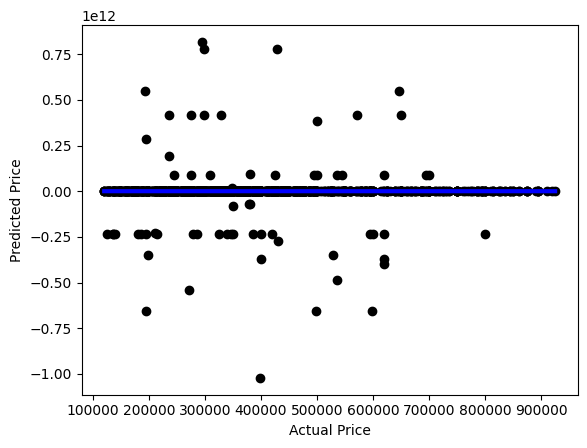

In [ ]:
# dropped province and district kept region
prep_df_h = preprocess(df_h_region)

y = prep_df_h['price'].to_numpy()
X = prep_df_h.drop('price', axis=1).to_numpy()

train_linear(X, y)



Coefficients: 
 [24245.90351178 19990.24091421 14399.36645398 ...   539.07167089
 -1581.97480132  1042.90313045]
Mean squared error: 4942633439.90
Coefficient of determination: 0.81
Training score: 0.9006239306225887
Test score: 0.813264185111737


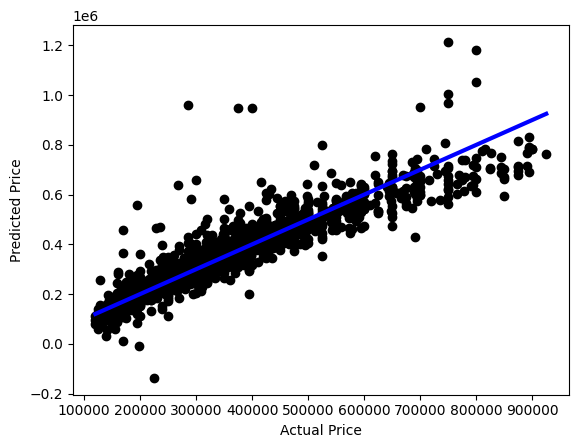

In [ ]:
# dropped province and region kept district
prep_df_h = preprocess(df_h_district)

y = prep_df_h['price'].to_numpy()
X = prep_df_h.drop('price', axis=1).to_numpy()

train_linear(X, y)

In [ ]:
# remove outliers
# check for Multicollinearity
# Standardize and/or normalize
# reduce feature count



# xgboost
# cross validation